#Домашнее задание № 12

#Feature Selection

#1. Генерация данных

In [709]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [710]:
from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(scale=1)

In [711]:
# посмотрим, что мы имеем
x_data_generated

array([[-0.95699827,  0.8417259 ,  0.53531264, ..., -0.5404285 ,
         0.54350562,  1.42963612],
       [-1.670926  , -0.75170579,  0.42788104, ..., -0.05187748,
         3.17771172, -1.38253997],
       [-0.2808851 ,  0.84816198, -1.17812971, ...,  1.3305518 ,
         0.50575233, -0.59494467],
       ...,
       [-1.52876019,  0.31706288,  0.49325312, ..., -0.34987873,
        -0.86317762, -0.82400878],
       [-0.97290241,  0.28682829, -0.58722179, ...,  0.23664411,
        -0.64506204, -0.2019648 ],
       [-0.1158321 , -1.12887826, -2.03978432, ...,  0.94052146,
        -1.63736894, -0.08747065]])

In [712]:
x_data_generated.shape

(100, 20)

In [713]:
y_data_generated

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [714]:
y_data_generated.shape

(100,)

#2. Построим модель логистической регрессии и оценим среднюю точность.

In [715]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [716]:
# наша базовая функция для оценки средней точности
def report(X, y):

  report = cross_val_score(LogisticRegression(),
                           X, y,
                           scoring='accuracy'
                          ).mean()

  return report

In [717]:
# получим среднюю точность
y_ = report(x_data_generated, y_data_generated)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.92


In [718]:
# запомним данные
x_report = []
y_report = []
n_report = []

x_report.append('df_by_default')
y_report.append(y_)
n_report.append(x_data_generated.shape[1])

#3. Используем статистические методы для отбора признаков

а) Признаки на основе матрицы корреляции

объединю все данные в уже привычный мне df

In [719]:
X = pd.DataFrame(x_data_generated)
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.956998,0.841726,0.535313,1.191584,-1.673822,1.824654,1.150811,0.593108,-1.596028,-0.167182,-1.329775,-0.530125,1.444936,0.105463,-1.864466,-0.974064,0.215249,-0.540429,0.543506,1.429636
1,-1.670926,-0.751706,0.427881,-0.880233,-1.249900,1.541039,-1.409327,0.503309,-1.154246,-0.177962,0.874081,1.456931,-0.196146,1.979413,0.478296,-1.310918,0.284645,-0.051877,3.177712,-1.382540


In [720]:
X.shape

(100, 20)

In [721]:
y = pd.DataFrame(y_data_generated)
# переименую колонку
y.columns = ['target']
y.head(2)

,target
0,1
1,0


In [722]:
y.shape

(100, 1)

объединю все это в уже привычный мне df

In [723]:
df = pd.concat([X, y], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-0.956998,0.841726,0.535313,1.191584,-1.673822,1.824654,1.150811,0.593108,-1.596028,-0.167182,...,-0.530125,1.444936,0.105463,-1.864466,-0.974064,0.215249,-0.540429,0.543506,1.429636,1
1,-1.670926,-0.751706,0.427881,-0.880233,-1.249900,1.541039,-1.409327,0.503309,-1.154246,-0.177962,...,1.456931,-0.196146,1.979413,0.478296,-1.310918,0.284645,-0.051877,3.177712,-1.382540,0
2,-0.280885,0.848162,-1.178130,0.075516,-1.316604,-0.084306,1.487633,-0.098500,-0.430897,0.078630,...,0.332755,1.874407,2.120098,-0.190581,-0.616387,-1.108707,1.330552,0.505752,-0.594945,1
3,-0.140206,0.710780,-0.280587,-0.949002,1.057000,-1.844369,-1.463137,0.743875,-1.473799,1.724364,...,-0.771851,-2.362531,1.648704,-0.943455,-0.088138,0.262222,-1.669078,0.316796,1.318176,0
4,0.013141,0.966663,1.004316,1.519504,-1.319279,-1.320680,1.294902,0.329964,1.509392,0.382920,...,0.132211,-0.800751,-0.624322,2.045423,-2.503307,0.411423,1.596044,0.665018,0.945417,1


In [724]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.056932,-0.036735,-0.056409,0.018392,0.013704,0.079757,0.018372,-0.048350,-0.061194,-0.005147,...,0.101871,0.036292,0.047250,0.155499,-0.073964,0.002839,0.026652,-0.139141,0.157380,0.500000
std,1.060686,1.008719,0.889765,0.982030,0.993269,1.075012,1.135835,1.000471,1.031449,0.915496,...,1.033156,1.032334,0.986393,0.993304,1.025337,1.219759,0.950458,1.052025,0.932771,0.502519
min,-2.692865,-3.156995,-2.039784,-1.765363,-2.556024,-2.023844,-2.631608,-1.969041,-2.578703,-2.128465,...,-2.462506,-2.594014,-2.613747,-2.092746,-3.139703,-3.431153,-2.174956,-2.935220,-2.113762,0.000000
25%,-0.814996,-0.627687,-0.714580,-0.912193,-0.843894,-0.631033,-0.967548,-0.839732,-0.713064,-0.691528,...,-0.552444,-0.655715,-0.589630,-0.601493,-0.619852,-0.687100,-0.503501,-0.866935,-0.421668,0.000000
50%,-0.028309,0.093269,-0.023248,0.080662,0.112344,-0.033651,0.033620,-0.013273,-0.108332,-0.146833,...,0.104876,0.110535,0.021376,0.204557,-0.057465,0.054784,-0.023892,-0.082465,0.124563,0.500000
75%,0.659418,0.689145,0.548465,0.930733,0.620926,0.838583,0.941759,0.644946,0.579042,0.620257,...,0.802240,0.774051,0.628890,0.783392,0.492359,0.667758,0.506828,0.572785,0.760225,1.000000
max,2.195038,1.710274,1.834807,2.115972,2.803321,2.635502,2.774306,2.253870,2.695582,2.060036,...,3.220430,1.960417,2.423375,2.261257,2.220002,3.075859,3.115940,3.177712,2.803681,1.000000


Разброс данных не большой. Принимаю решение не делать нормализацию.

#3. Используем статистические методы для отбора признаков

a) Выбор признаков на основе матрицы корреляции

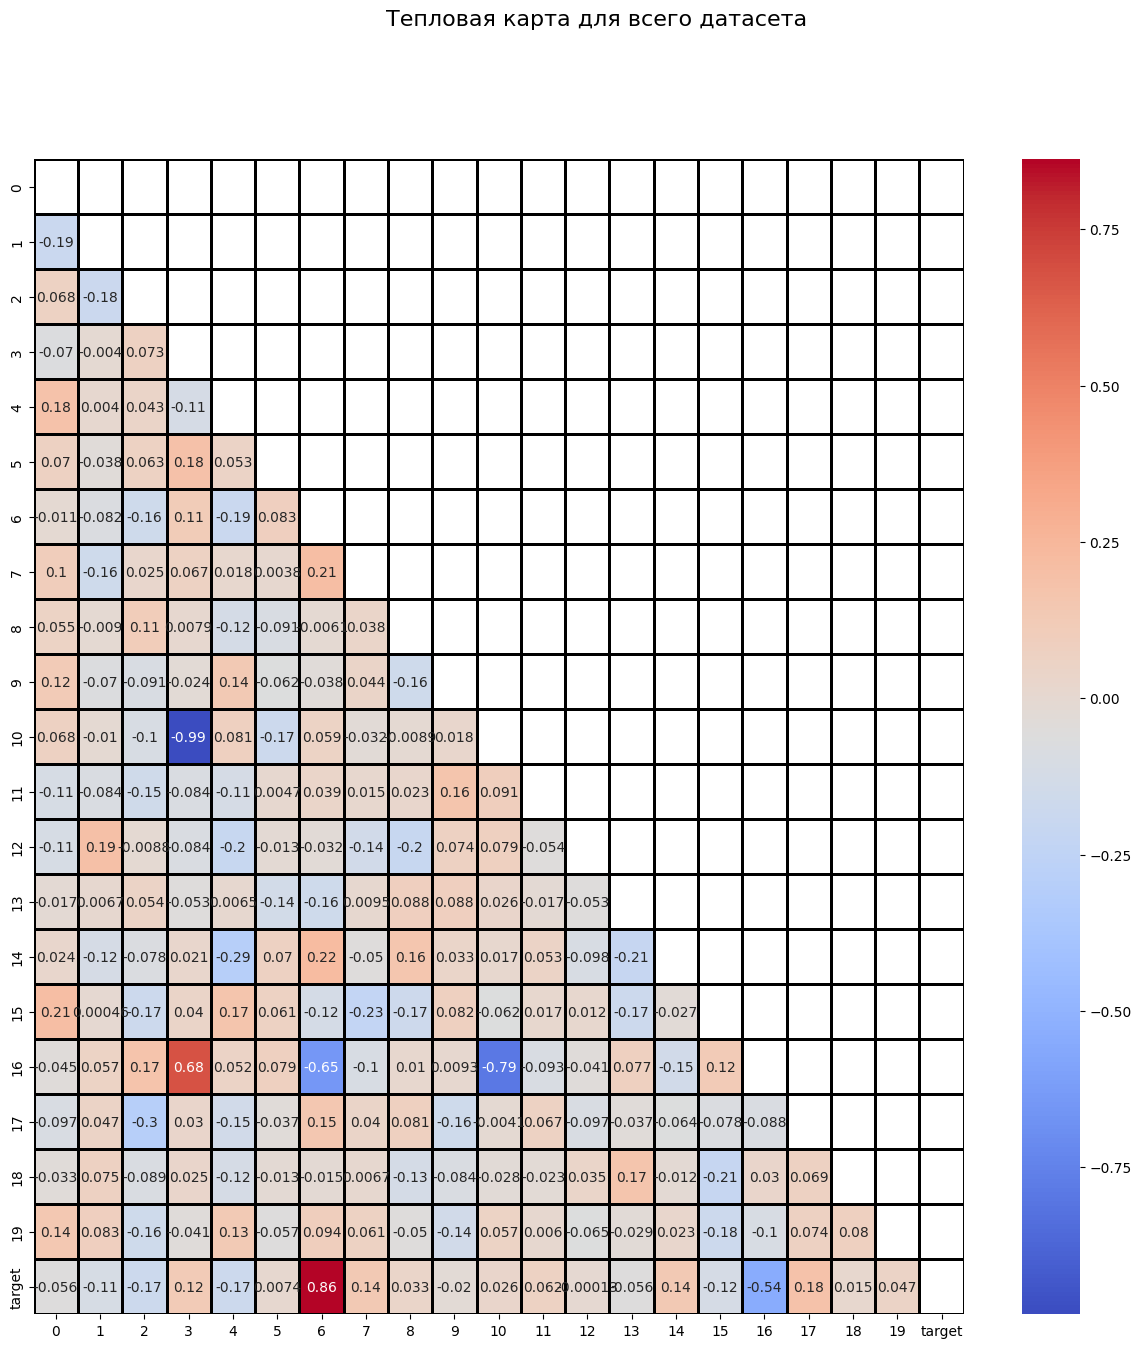

In [725]:
matrix = np.triu(df.corr())     # для построение карты треугольной форма

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),          # построение корреляции
            annot=True,         # нахождение коэффициенто корреляции
            fmt='.2g',          # не более 2-х знаков после запятой
            cmap='coolwarm',    # настройка цвета
            linewidths=1,       # толщина линий
            linecolor='black',  # цвет линий
            mask=matrix         # треуголиник основанием вниз
            )

plt.suptitle('Тепловая карта для всего датасета', fontsize=16)
plt.show()

Много всего интересного, но оставим только то, что влият на целевую переменную

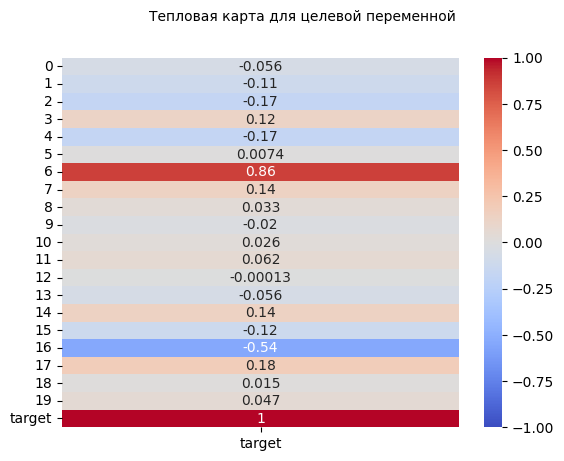

In [726]:
sns.heatmap(df.corr()[['target']], vmin=-1, vmax=+1, annot=True, cmap='coolwarm')
plt.suptitle('Тепловая карта для целевой переменной', fontsize=10)
plt.show()

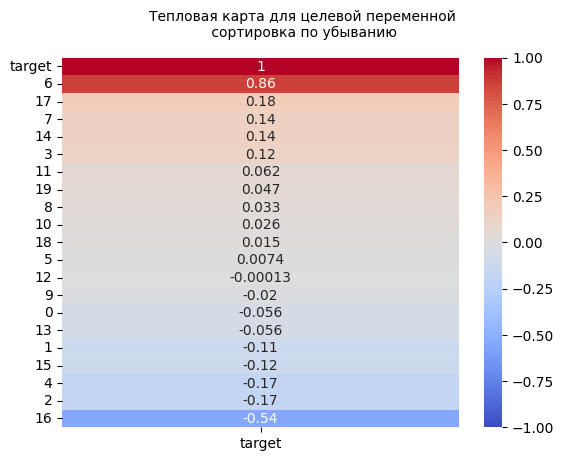

In [727]:
# отсортируем по убыванию
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False),
            vmin=-1,
            vmax=+1,
            annot=True,
            cmap='coolwarm'
           )
plt.suptitle('Тепловая карта для целевой переменной\n сортировка по убыванию', fontsize=10)
plt.show()

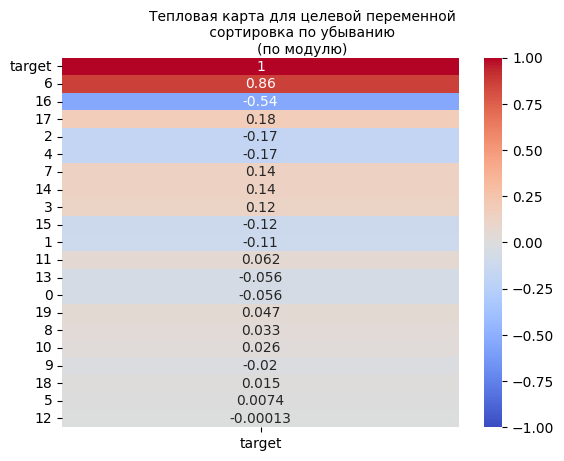

In [728]:
# а так же учтем, что отрицательные значения так же влияют на целевую переменную
# просто с другим знаком
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False, key=abs),
            vmin=-1,
            vmax=+1,
            annot=True,
            cmap='coolwarm'
           )
plt.suptitle('Тепловая карта для целевой переменной\n сортировка по убыванию \n(по модулю)', fontsize=10)
plt.show()


In [729]:
# получим коэффициенты корреляции
corr_coefficients = df.corr()[['target']].sort_values(by='target', ascending=False, key=abs)
corr_coefficients.drop(corr_coefficients[:1], inplace=True)
corr_coefficients.head()

,target
6,0.861877
16,-0.543408
17,0.181692
2,-0.174504
4,-0.172214


In [730]:
# получим список значений
corr_list = corr_coefficients.index.to_list()
corr_list

[6, 16, 17, 2, 4, 7, 14, 3, 15, 1, 11, 13, 0, 19, 8, 10, 9, 18, 5, 12]

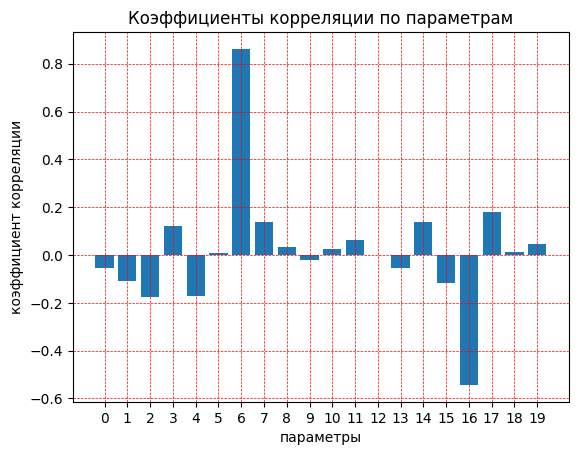

In [731]:
# коэффициенты корреляции тоже визуализируем
plt.bar(corr_list, corr_coefficients['target'].to_list())
plt.xticks(np.arange(min(corr_list), max(corr_list)+1, 1.0))
plt.title('Коэффициенты корреляции по параметрам')
plt.xlabel('параметры')
plt.ylabel('коэффициент корреляции')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)
plt.show()

In [732]:
# зададим порог отсечения
cut_off = 0.3

# оставим только переменные коэффициент корреляции для которых >= cut_off
corr_coefficients = corr_coefficients.loc[abs(corr_coefficients['target']) >= cut_off]
corr_coefficients

,target
6,0.861877
16,-0.543408


In [733]:
# сохраним найденные переменные
corr_list = corr_coefficients.index.to_list()
corr_list

[6, 16]

In [734]:
# сохраним df_corr с найденными максимальными значениями параметров
df_corr = df[corr_list]
df_corr.insert(len(df_corr.columns), 'target', df['target'], True)
df_corr.head(2)

,6,16,target
0,1.150811,0.215249,1
1,-1.409327,0.284645,0


b) Отсечем низковариативные признаки (VarianceThreshold).

Функция выбирает только признаки, которые соответствуют определённому пороговому значению.

In [735]:
from sklearn.feature_selection import VarianceThreshold

In [736]:
# подготовим данные
X = x_data_generated
y = y_data_generated

In [737]:
# построим модель
# зададим пороговое значение
vt = VarianceThreshold(threshold=0.99)

In [738]:
# обучим модель
vt.fit(X, y=None)

VarianceThreshold(threshold=0.99)

In [739]:
# получим параметры, которые остались после проверки
vt_list = vt.get_support(indices=True)
vt_list

array([ 0,  1,  5,  6,  7,  8, 10, 11, 12, 15, 16, 18])

In [740]:
# сохраним как df_vt
df_vt = df[vt_list].copy()
df_vt.insert(len(df_vt.columns), 'target', df['target'], True)
df_vt.head(2)

,0,1,5,6,7,8,10,11,12,15,16,18,target
0,-0.956998,0.841726,1.824654,1.150811,0.593108,-1.596028,-1.329775,-0.530125,1.444936,-0.974064,0.215249,0.543506,1
1,-1.670926,-0.751706,1.541039,-1.409327,0.503309,-1.154246,0.874081,1.456931,-0.196146,-1.310918,0.284645,3.177712,0


c) Построим модель логистической регрессии и оценим среднюю точность с учетом обработанных данных

Данные на основе корреляции признаков

In [741]:
# подготовим данные
X = df_corr.drop(['target'], axis=1).copy()
y = df_corr['target']

In [742]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.94


In [743]:
# запомним данные
x_report.append('Correlation')
y_report.append(y_)
n_report.append(X.shape[1])

Данные на основе отсечения низковариативных признаков (VarianceThreshold).

In [744]:
# подготовим данные
X = df_vt.drop(['target'], axis=1).copy()
у = df_vt['target']

In [745]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.95


In [746]:
# запомним данные
x_report.append('VarianceThreshold')
y_report.append(y_)
n_report.append(X.shape[1])

#4. Отбор признаков на основе дисперсионного анализа

a) Выбираем 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [747]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [748]:
skb = SelectKBest(score_func=f_classif,   # критерий для отбора признаков
                  k=5                     # из набора данных будут выбраны 5 лучши функций
                 )

In [749]:
# подготовим данные
X = x_data_generated
y = y_data_generated

In [750]:
# обучим модель
skb.fit(X, y)

SelectKBest(k=5)

In [751]:
# получим параметры, которые остались после проверки
skb_list = skb.get_support(indices=True)
skb_list

array([ 2,  4,  6, 16, 17])

In [752]:
# сохраним как df_skb
df_skb = df[skb_list].copy()
df_skb.insert(len(df_skb.columns), 'target', df['target'], True)
df_skb.head(2)

,2,4,6,16,17,target
0,0.535313,-1.673822,1.150811,0.215249,-0.540429,1
1,0.427881,-1.249900,-1.409327,0.284645,-0.051877,0


b) Построим модель логистической регрессии и оценим среднюю точность с учетом обработанных данных

In [753]:
# подготовим данные
X = df_skb.drop(['target'], axis=1).copy()
у = df_skb['target']

In [754]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.94


In [755]:
# запомним данные
x_report.append('SelectKBest')
y_report.append(y_)
n_report.append(X.shape[1])

#5. Отбор с использованием моделей.

In [756]:
# подготовим данные
X = x_data_generated
y = y_data_generated

a) Отбор признаков с помощью логистической регрессии. Отобранные признаки подаем далее на вход в саму логистическую регрессию (SelectFromModel). Используем L1 регуляризацию.

In [757]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [758]:
# Создадим модель логистической регрессии
lr = LogisticRegression(random_state=42)

In [759]:
# попробуем найти оптимальное значение C
param_grid = [
              {'penalty' : ['l1'],                      # указывает на тип регуляции L1
               'C' : np.logspace(-10, 10, 20),          # величина регуляции. по умролчанию 1
               'solver' : ['liblinear'],                # алгоритм для нахождения параметров модели
               'max_iter' : [100, 1000, 2500, 5000]     # итерации
              }
             ]

model_lr = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [760]:
# обучим модель
# и найдем лучшее значение C
res_ = model_lr.fit(X, y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [761]:
# Получим нашу лучшую модель
best_lr = res_.best_estimator_
best_lr

LogisticRegression(C=0.2976351441631313, penalty='l1', random_state=42,
                   solver='liblinear')

In [762]:
# судя по цвету она уже обучена

In [763]:
# Произведём отбор признаков с помощью уже обученной моделью
sfm_lr = SelectFromModel(estimator=best_lr, # уже обученная модель
                         threshold=0.6,     # порог важности
                                            # None-среднее значение важности функций
                         prefit=True,       # передаtv в SelectFromModel уже обученную модель
                        )

In [764]:
# обучим
sfm_lr.fit(X, y)
sfm_lr

SelectFromModel(estimator=LogisticRegression(C=0.2976351441631313, penalty='l1',
                                             random_state=42,
                                             solver='liblinear'),
                prefit=True, threshold=0.6)

In [765]:
# получим параметры, которые остались после проверки
sfm_lr_list = sfm_lr.get_support(indices=True)
sfm_lr_list

array([6])

In [766]:
# сохраним как df_sfm_lr
df_sfm_lr = df[sfm_lr_list].copy()
df_sfm_lr.insert(len(df_sfm_lr.columns), 'target', df['target'], True)
df_sfm_lr.head(2)

,6,target
0,1.150811,1
1,-1.409327,0


b) Отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [767]:
from sklearn.ensemble import RandomForestClassifier

In [768]:
# построим модель
rfc = RandomForestClassifier(random_state=42)

In [769]:
# подготовим данные
X = df.drop({'target'}, axis=1)
y = df['target']

In [770]:
# поищем хорошие параметры
param_grid = {
              'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20],
              'min_samples_leaf': [1, 2, 4, 10]
             }

In [771]:
# Создим экземпляр GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5)

In [772]:
# Запускаем поиск лучших параметров
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'n_estimators': [50, 100, 150]})

In [773]:
# наши лучшие параметры
best_params_rfc = grid_search.best_params_
best_params_rfc

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

In [774]:
# построим и обучим нашу лучшую модель
best_rfc = RandomForestClassifier(**best_params_rfc, random_state=42)
best_rfc.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=42)

In [775]:
# получаем важные признаки
importances = best_rfc.feature_importances_
importances

array([0.02407774, 0.0082754 , 0.01794693, 0.05993492, 0.01833836,
       0.02020229, 0.50033232, 0.01692974, 0.00698514, 0.01227469,
       0.04028793, 0.01381136, 0.00718947, 0.01639441, 0.01581498,
       0.00669407, 0.15149242, 0.02304345, 0.02547044, 0.01450393])

In [776]:
# отберем только значения больше заданной величины
feature_names = X.columns
tmp_ = pd.DataFrame({'Importance': importances})
tmp_ = tmp_[tmp_['Importance'] >= 0.1]
tmp_

,Importance
6,0.500332
16,0.151492


In [777]:
# получим параметры, которые остались после проверки
best_rfc_list = tmp_.index.to_list()
best_rfc_list

[6, 16]

In [778]:
# сохраним как df_rfc
df_rfc = df[best_rfc_list].copy()
df_rfc.insert(len(best_rfc_list), 'target', df['target'], True)
df_rfc.head(2)

,6,16,target
0,1.150811,0.215249,1
1,-1.409327,0.284645,0


c) Оценим точность

Данные на основе SelectFromModel

In [779]:
# подготовим данные
X = df_sfm_lr.drop(['target'], axis=1).copy()
у = df_sfm_lr['target']

In [780]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.95


In [781]:
# запомним данные
x_report.append('SelectFromModel')
y_report.append(y_)
n_report.append(X.shape[1])

Данные на основе RandomForest.

In [782]:
# подготовим данные
X = df_rfc.drop(['target'], axis=1).copy()
у = df_rfc['target']

In [783]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.94


In [784]:
# запомним данные
x_report.append('RandomForestClassifier')
y_report.append(y_)
n_report.append(X.shape[1])

#6. Перебор признаков

SequentialFeatureSelector - Трансформатор, который выполняет последовательный выбор функций.

In [785]:
# подготовим данные
X = df.drop(['target'], axis=1).copy()
у = df['target']

In [786]:
X.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.956998,0.841726,0.535313,1.191584,-1.673822,1.824654,1.150811,0.593108,-1.596028,-0.167182,-1.329775,-0.530125,1.444936,0.105463,-1.864466,-0.974064,0.215249,-0.540429,0.543506,1.429636


In [787]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [788]:
# построим модель
knc = KNeighborsClassifier()

In [789]:
# попробуем поискать лучшие параметры
param_grid = {
              'n_neighbors': [3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }

In [790]:
# построим модель
grid_search = GridSearchCV(estimator=knc,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=True
                          )

In [791]:
# обучим модель
grid_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [792]:
# наши лучшие параметры
best_params_knc = grid_search.best_params_
best_params_knc

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [793]:
# построим и обучим нашу лучшую модель
best_knc = KNeighborsClassifier(**best_params_knc)
best_knc.fit(X, y)

KNeighborsClassifier(n_neighbors=7, p=1)

In [794]:
# построим модель
sfs = SequentialFeatureSelector(best_knc,
                                n_features_to_select=3
                               )

In [795]:
# обучим модель
sfs.fit(X, y)
sfs

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=7, p=1),
                          n_features_to_select=3)

In [796]:
# получим параметры, которые остались после проверки
sfm_list = sfs.get_support(indices=True)
sfm_list

array([1, 3, 6])

In [797]:
# получим маску
mask_sfs = sfs.get_support(indices=False)
mask_sfs

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [798]:
# сохраним как df_sfs
df_sfs = df[sfm_list].copy()
df_sfs.insert(len(df_sfs.columns), 'target', df['target'], True)
df_sfs.head(2)

,1,3,6,target
0,0.841726,1.191584,1.150811,1
1,-0.751706,-0.880233,-1.409327,0


b) Получим искомую величину

In [799]:
# подготовим данные
X = df_sfs.drop(['target'], axis=1).copy()
у = df_sfs['target']

In [800]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.95


In [801]:
# запомним данные
x_report.append('SequentialFeatureSelector')
y_report.append(y_)
n_report.append(X.shape[1])

#8. Краткий отчет о проделанной работе

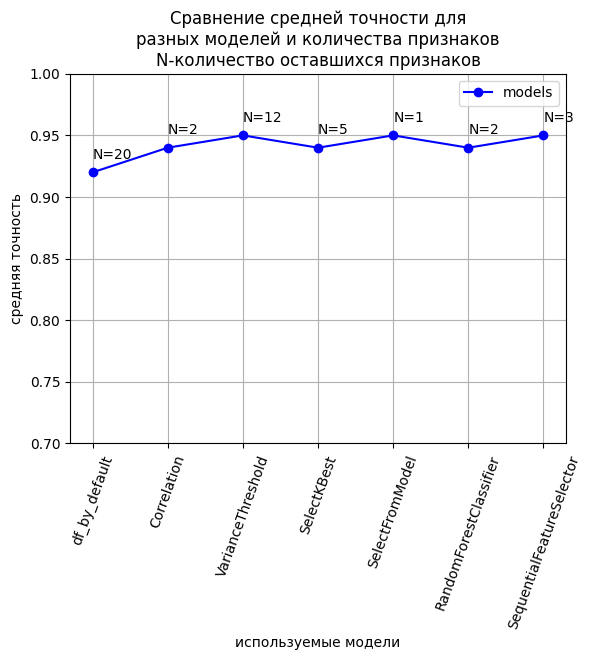

In [802]:
# визуализируем
plt.plot(x_report, y_report,'bo-', label='models')

for i, number in enumerate(n_report, start=0):
    label = 'N={}'.format(n_report[i])
    plt.annotate(label, (x_report[i], y_report[i]),
                 textcoords='offset points', xytext=(0, 10)
                )

plt.xticks(list(range(0, len(x_report), 1)))
plt.xlabel('используемые модели')
plt.xticks(rotation=70)
plt.ylabel('средняя точность')
plt.title('Сравнение средней точности для\nразных моделей и количества признаков\nN-количество оставшихся признаков')
plt.ylim (0.7, 1)
plt.legend()
plt.grid(True)

plt.show()